# Zuber EDA

Fernando Soares Goudard

The activity consists of analyzing data collected from Zuber, a new ride-sharing company being launched in Chicago. The task is to find patterns in the available information. The goal is to understand passenger preferences and the impact of external factors on rides.

Working with a database, I will analyze competitor data and test a hypothesis about the impact of weather on trip frequency.


In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the data and initial overview

Let's start by importing the datasets and printing some information to get to know the data.

In [2]:
df_res_01 = pd.read_csv('moved_project_sql_result_01.csv')
df_res_04 = pd.read_csv('moved_project_sql_result_04.csv')


In [3]:
# Taking a first look at dataframe 01:

df_res_01.info()
print()
print(df_res_01.sample(5))
print()
print(df_res_01.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

                     company_name  trips_amount
3                      Yellow Cab          9888
51           4623 - 27290 Jay Kim            15
6                    City Service          8448
7                        Sun Taxi          7701
47  4615 - 83503 Tyrone Henderson            21

       company_name  trips_amount
count            64     64.000000
unique           64           NaN
top       Flash Cab           NaN
freq              1           NaN
mean            NaN   2145.484375
std             NaN   3812.310186
min             NaN      2.000000
25%             NaN     20.750000
50%             NaN    178.500000
75%             NaN   2106.500000
max             

In [4]:
# Taking a first look at dataframe 04:

df_res_04.info()
print()
print(df_res_04.sample(5))
print()
print(df_res_04.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

   dropoff_location_name  average_trips
64               Oakland      16.633333
68              Clearing      14.500000
10          Lincoln Park    1246.533333
57               Hermosa      27.566667
52        Little Village      33.800000

       dropoff_location_name  average_trips
count                     94      94.000000
unique                    94            NaN
top                     Loop            NaN
freq                       1            NaN
mean                     NaN     599.953728
std                      NaN    1714.591098
min                      NaN       1.800000
25%                      NaN      14.266667


We don't have any problems with empty cells in these dataframes, let's analyze duplicates.

In [5]:
print('Number of duplicates in df_01:', df_res_01.duplicated().sum())
print('Number of duplicates in df_04:', df_res_04.duplicated().sum())

Number of duplicates in df_01: 0
Number of duplicates in df_04: 0


We also don't have duplicates. Let's look at a small sample of the two.

In [6]:
print('Df_01:')
print(df_res_01.head(5))
print()
print('Df_04:')
print(df_res_04.head(5))

Df_01:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Df_04:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


Looking at the data, we can confirm that the types are correct, the strings are stored as Object, and the numeric values have the correct types (int for integer values of trip count and float for fractional values such as average trips).

We can also see that they are organized in descending order of “trips_amount” and “average_trips.”

##### Identify the top 10 neighborhoods in terms of destinations

We can just take the first 10 entries from df_res_04.

In [7]:
print(df_res_04.head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


##### Create graphs: taxi companies and number of rides, top 10 neighborhoods by number of rides where that neighborhood is the destination

In [8]:

labels = {
    'dropoff_location_name':'Destination (neighborhood)',
    'average_trips':'Average Trips',
    'company_name':'Company',
    'trips_amount':'Trips'
}


In [9]:

# sorting the dataframe by number of trips:
df_res_01.sort_values('trips_amount', ascending=False, inplace=True)
df_res_01.reset_index(drop=True, inplace=True)
print(df_res_01.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


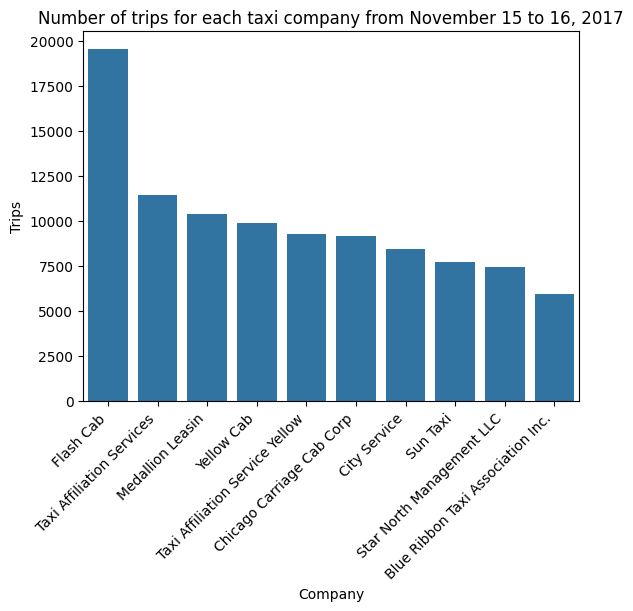

In [10]:
# graph of taxi companies and number of trips (top 10 only):
fig = sns.barplot(data = df_res_01.head(10), 
       x='company_name', 
       y='trips_amount',
       order = df_res_01['company_name'].head(10))
fig.set_title('Number of trips for each taxi company from November 15 to 16, 2017')
fig.set_xlabel('Company')
fig.set_ylabel('Trips')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
# sorting the dataframe by average trips:
df_res_04.sort_values('average_trips', ascending=False, inplace=True)
df_res_04.reset_index(drop=True, inplace=True)
print(df_res_04.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


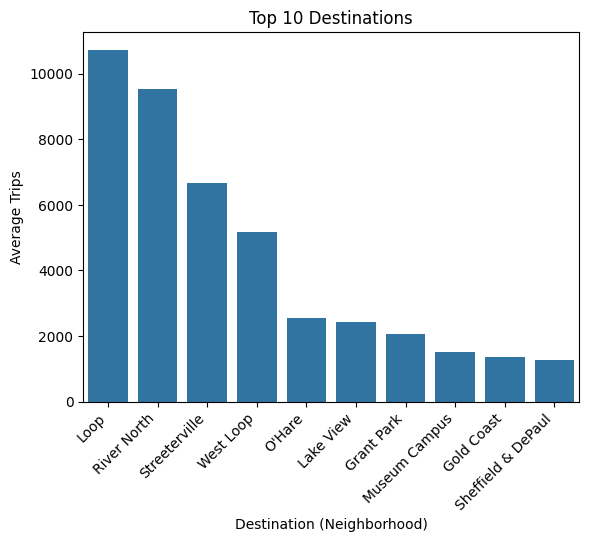

In [12]:
# Top 10 neighborhoods by number of rides to that neighborhood:
fig = sns.barplot(data = df_res_04.head(10), 
       x='dropoff_location_name', 
       y='average_trips',
       order = df_res_04['dropoff_location_name'].head(10))
fig.set_title('Top 10 Destinations')
fig.set_xlabel('Destination (Neighborhood)')
fig.set_ylabel('Average Trips')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Conclusions based on the graph:

Looking at the graphs, we can better understand our reality.
The graph of companies by number of trips shows us that Flash Cab dominates the local taxi market, with almost twice as many trips as its closest competitor. After Flash Cab, there are eight other companies with a similar market presence. Following the graph, we see that the other companies end up competing for the “leftovers” of the larger ones.
In the Top 10 destinations graph, we see that the most popular locations are Loop and River North, followed by West Loop and O'Hare, with the other neighborhoods lagging behind with much lower average trip values.
Based on this information, we can draw some conclusions, such as that Loop and River North must be major centers of work or entertainment (places where it is more common to take a taxi) and that Flash Cab must have a much larger number of taxis than its competitors in order to handle twice as many trips.

##### Testing hypotheses

In [13]:
# importing the new dataframe and taking a look at the graphs

df_res_07 = pd.read_csv('moved_project_sql_result_07.csv')
df_res_07.info()
print()
print(df_res_07.sample(5))
print()
print(df_res_07.describe(include='all'))
print()
print('Number of duplicates:', df_res_07.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

                 start_ts weather_conditions  duration_seconds
784   2017-11-11 17:00:00               Good            2089.0
1061  2017-11-18 16:00:00                Bad            2186.0
151   2017-11-18 06:00:00               Good            1420.0
651   2017-11-18 14:00:00               Good            3172.0
1065  2017-11-11 13:00:00               Good            2100.0

                   start_ts weather_conditions  duration_seconds
count                  1068               1068       1068.000000
unique                   81                  2               NaN
top     2017-11-11 10

We can already see some problems with the data.

* 197 duplicate entries
* start_ts as type Object(string) and not timestamp
* weather_conditions could be type category
* duration_seconds could be type int

In [14]:
# removing duplicate entries

df_res_07.drop_duplicates(inplace=True)
df_res_07.reset_index(drop=True, inplace=True)

In [15]:
# adjusting data types:

df_res_07['start_ts'] = pd.to_datetime(df_res_07['start_ts'], format='%Y-%m-%d %H:%M:%S')
df_res_07['duration_seconds'] = df_res_07['duration_seconds'].astype('int64')
df_res_07['weather_conditions'] = df_res_07['weather_conditions'].astype('category')

In [16]:
# checking the result:

df_res_07.info()
print()
print('duplicate values:', df_res_07.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    category      
 2   duration_seconds    871 non-null    int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 14.7 KB

duplicate values: 0


Now we have the data ready to perform some analyses:

##### Test the hypothesis:

##### “The average duration of Loop rides to O'Hare International Airport changes on rainy Saturdays.” 

##### Decide where to set the significance level (alpha) on your own.

Let's test the hypothesis with two alphas, 5% and 1%.

But first we need to define the null and alternative hypotheses:

H0: The average duration of Loop rides to O'Hare International Airport is the same on rainy Saturdays.

H1: The average duration of Loop rides to O'Hare International Airport is different on rainy Saturdays.


In [17]:
# First, let's separate the data only for trips from Loop to O'Hare International Airport on rainy Saturdays.

df_rainy_sats = df_res_07[(df_res_07['weather_conditions']=='Bad')&(df_res_07['start_ts'].dt.weekday == 5)]
df_rainy_sats.reset_index(drop=True, inplace=True)
print(df_rainy_sats.head())

             start_ts weather_conditions  duration_seconds
0 2017-11-04 16:00:00                Bad              2969
1 2017-11-18 12:00:00                Bad              1980
2 2017-11-04 17:00:00                Bad              2460
3 2017-11-04 16:00:00                Bad              2760
4 2017-11-18 12:00:00                Bad              2460


In [18]:
p_1 = 0.01
p_5 = 0.05

In [19]:
# let's separate our samples, we only want the duration of the trips
st_rainy_sats = df_rainy_sats['duration_seconds']
st_res_07 = df_res_07[df_res_07['weather_conditions']!='Bad']['duration_seconds']

# Performing the test to assess whether the variance of the samples is equal
# Let's create a Boolean variable to define whether the variance is equal:
is_equal_var = st_rainy_sats.var() == st_res_07.var()
print('Variance is equal: ', is_equal_var)
# we will assign to the calculation of the result with ttest_ind
results = st.ttest_ind(st_rainy_sats, st_res_07, equal_var=is_equal_var)

print('p-value:', results.pvalue)

if results.pvalue < p_1:
    print('We reject the null hypothesis.')
elif results.pvalue < p_5:
    print('We reject the null hypothesis only for a significance level of 5%, not 1%.')
else:
    print('We cannot reject the null hypothesis.')

Variance is equal:  False
p-value: 9.126383933880083e-08
We reject the null hypothesis.


Based on this test, we can confirm that the average duration of Loop trips to O'Hare Airport on rainy Saturdays is different from the average duration on all other days. But we can make a direct comparison between Saturdays with and without rain.

Let's keep the same null and alternative hypotheses, but run a test using only the values for Saturdays with good and bad weather.

In [20]:
# First, let's separate the data only for trips from Loop to O'Hare International Airport on rainy Saturdays.

df_sunny_sats = df_res_07[(df_res_07['weather_conditions']=='Good')&(df_res_07['start_ts'].dt.weekday == 5)]
df_sunny_sats.reset_index(drop=True, inplace=True)
st_sunny_sats = df_sunny_sats['duration_seconds']
print(df_sunny_sats.head())

             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good              2410
1 2017-11-25 14:00:00               Good              1920
2 2017-11-25 12:00:00               Good              1543
3 2017-11-04 10:00:00               Good              2512
4 2017-11-11 07:00:00               Good              1440


In [21]:
# Performing the test to assess whether the variance of the samples is equal
# Let's create a Boolean variable to define whether the variance is equal:
is_equal_var = st_rainy_sats.var() == st_sunny_sats.var()
print('Variance is equal: ', is_equal_var)
# we will assign to the calculation of the result with ttest_ind
results = st.ttest_ind(st_rainy_sats, st_sunny_sats, equal_var=is_equal_var)

print('p-value:', results.pvalue)

if results.pvalue < p_1:
    print('We reject the null hypothesis.')
elif results.pvalue < p_5:
    print('We reject the null hypothesis only for a significance level of 5%, not 1%.')
else:
    print('We cannot reject the null hypothesis.')

Variance is equal:  False
p-value: 9.126383933880083e-08
We reject the null hypothesis.


We can also confirm that the average duration is different in this case.

## Conclusion

Through analysis and statistical testing, some important facts were identified. A few taxi agencies make up the majority of trips. A few neighborhoods are the destination for most passengers. On rainy Saturdays, the average duration of trips from the Loop to O'Hare International Airport has a longer average travel time.